

<center>

## Numerical Exercise 1
### Md Shariar Imroze Khan
### Matriculation Number: 220202354

</center>

___________________________________________________________________________


### Importing Libraries

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import plotly.graph_objects as go

### Plotting the Rosenbrock Function

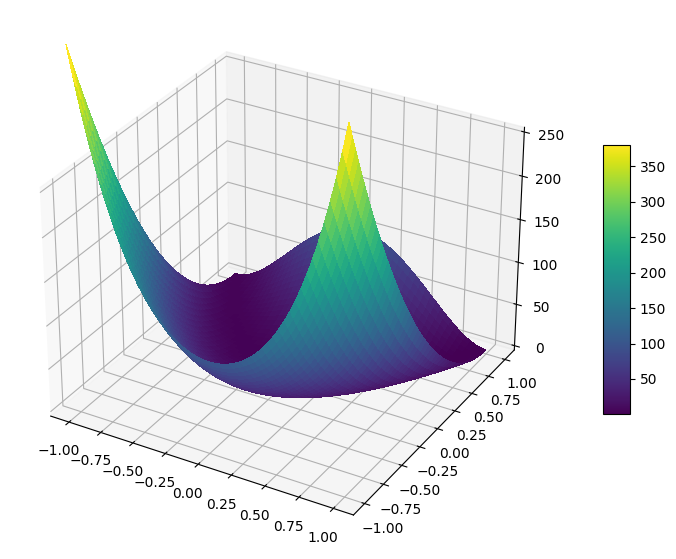

In [8]:
#Plotting the Rosenbrock Function
func = lambda x0, x1: (100 * (x1 - x0**2)**2 + (1 - x0)**2)
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111,projection='3d')

X = np.arange(-1,1,0.001)
Y = np.arange(-1,1,0.001)
X,Y = np.meshgrid(X,Y)
Z = func(X,Y)

surf = ax.plot_surface(X,Y,Z, cmap=cm.viridis,linewidth=0,antialiased=False)
ax.set_zlim(0,250)
fig.colorbar(surf,shrink=0.5,aspect=10)
plt.show()


### Descent Algorithm

In [9]:
#Define the Rosenbrock function
def func(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [10]:
#Define the gradient of the Rosenbrock function 
def func_gradient(x):
    grad = np.zeros(2)
    grad[0] = -400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0])
    grad[1] = 200 * (x[1] - x[0]**2)
    return grad

In [11]:
#Descent algorithm
def descent_algorithm(starting_point):
    
    xk = starting_point
    k = 0
    gradient_norms = []
    while k < 1e5:
        gradient = func_gradient(xk)
        gradient_norm = np.linalg.norm(gradient)
        gradient_norms.append(gradient_norm)
        if gradient_norm < 1e-5:
            break
        dk = -gradient
        tk = 0.00125
        xk = xk + tk * dk  
        k += 1
    return xk, gradient_norms, k

In [12]:
#Taking five different starting points 
starting_points = [
    np.array([-1.5, -1.5]),
    np.array([1.5, 1.5]),
    np.array([-1.5, 1.5]),
    np.array([1.5, -1.5]),
    np.array([0.5, 0.5])
]

results = []
for point in starting_points:
    result = descent_algorithm(point)
    results.append(result)



### 3D Interactive Plot

In [13]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, colorscale='viridis')])

for result in results:
    xk, gradient_norms, k = result
    fig.add_trace(go.Scatter3d(x=[xk[0]], y=[xk[1]], z=[func(xk)], mode='markers', marker=dict(color='red', size=8)))

fig.update_layout(
    title='Descent Algorithm for Rosenbrock Function',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    width=800,  
    height=800 
)

fig.show()
